In [3]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import scipy
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [195]:
# dataset_red=pd.read_csv("Data/红酒白酒分类+回归（都可以）/winequality-red.csv",sep=";",index_col=False)
# dataset_white=pd.read_csv("Data/红酒白酒分类+回归（都可以）/winequality-white.csv",sep=";",index_col=False)
dataset = pd.read_csv("Data/adult.data")
dataset.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'mmpy']
# dataset = pd.DataFrame(dataset, columns=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'])
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,mmpy
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [97]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(dataset["mmpy"])
X = dataset.drop("mmpy", axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=3)
pd.value_counts(y_test)

0    15314
1    15303
2    15283
dtype: int64

In [98]:
#normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer()
Xn_train = norm.fit_transform(X_train)
Xn_test = norm.transform(X_test)
Xn_test.shape

(45900, 4)

In [99]:
#NN model
model = keras.models.Sequential()
model.add(keras.layers.Dense(256, input_dim=4, activation="linear"))
model.add(keras.layers.Dense(256, activation="linear"))
model.add(keras.layers.Dense(256, activation="linear"))
model.add(keras.layers.Dense(256, activation="linear"))
model.add(keras.layers.Dense(3, activation="softmax"))
model.summary()
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_75 (Dense)             (None, 256)               1280      
_________________________________________________________________
dense_76 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_77 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_78 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_79 (Dense)             (None, 3)                 771       
Total params: 199,427
Trainable params: 199,427
Non-trainable params: 0
_________________________________________________________________


In [100]:
#train the model
model.fit(np.array(Xn_train), np.array(y_train), epochs=1000, validation_data=(np.array(Xn_test), np.array(y_test)))

Train on 107100 samples, validate on 45900 samples
Epoch 1/1000
107100/107100 [==============================] - 10s 98us/sample - loss: 1.0997 - acc: 0.3326 - val_loss: 1.0986 - val_acc: 0.3336
Epoch 2/1000
107100/107100 [==============================] - 10s 94us/sample - loss: 1.0989 - acc: 0.3326 - val_loss: 1.0987 - val_acc: 0.3330
Epoch 3/1000
107100/107100 [==============================] - 10s 98us/sample - loss: 1.0989 - acc: 0.3341 - val_loss: 1.0987 - val_acc: 0.3334
Epoch 4/1000
107100/107100 [==============================] - 11s 101us/sample - loss: 1.0991 - acc: 0.3335 - val_loss: 1.0987 - val_acc: 0.3334
Epoch 5/1000
107100/107100 [==============================] - 11s 105us/sample - loss: 1.0989 - acc: 0.3336 - val_loss: 1.0987 - val_acc: 0.3334
Epoch 6/1000
107100/107100 [==============================] - 11s 105us/sample - loss: 1.0990 - acc: 0.3351 - val_loss: 1.0987 - val_acc: 0.3330
Epoch 7/1000
107100/107100 [==============================] - 12s 107us/sample - l

KeyboardInterrupt: 

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict_classes(Xn_test)
print(y_pred)
print(y_test)
y_test = np.array(y_test)
y_test = y_test.reshape(y_test.shape[0], 1)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[0 1 1 ... 0 1 1]
[1 0 2 ... 0 1 0]
[[ 2243 13071     0]
 [ 2032 13271     0]
 [    0 15283     0]]


0.33799564270152505

In [64]:
scores = model.evaluate(np.array(Xn_test), np.array(y_test), verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 31.56%


In [140]:
dataset_red=pd.read_csv("Data/红酒白酒分类+回归（都可以）/winequality-red.csv",sep=";",index_col=False)
dataset_white=pd.read_csv("Data/红酒白酒分类+回归（都可以）/winequality-white.csv",sep=";",index_col=False)
# dataset_red.head(n=len(dataset_red))
red=["red"]*len(dataset_red)
dataset_red.insert(0,"Label",red)
white=["white"]*len(dataset_white)
dataset_white.insert(0,"Label",white)
dataset_white = dataset_white[:1599]
dataset=pd.concat([dataset_red,dataset_white],axis=0)
dataset.set_index("Label")
dataset["Label"].value_counts()

red      1599
white    1599
Name: Label, dtype: int64

In [169]:
#preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset["Label"]=le.fit_transform(dataset["Label"])
y = dataset["Label"]
X = dataset.drop('Label',axis=1)

#split the dataset into trainning set and testing set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
# dataset['Label'].value_counts(normalize=True)
X
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

0    1599
1    1599
Name: Label, dtype: int64
0    1302
1    1256
Name: Label, dtype: int64
1    343
0    297
Name: Label, dtype: int64


In [170]:
#Normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer()
norm = norm.fit(X_train)
Xn_train = norm.transform(X_train)
Xn_test = norm.transform(X_test)
Xn_train.shape

(2558, 12)

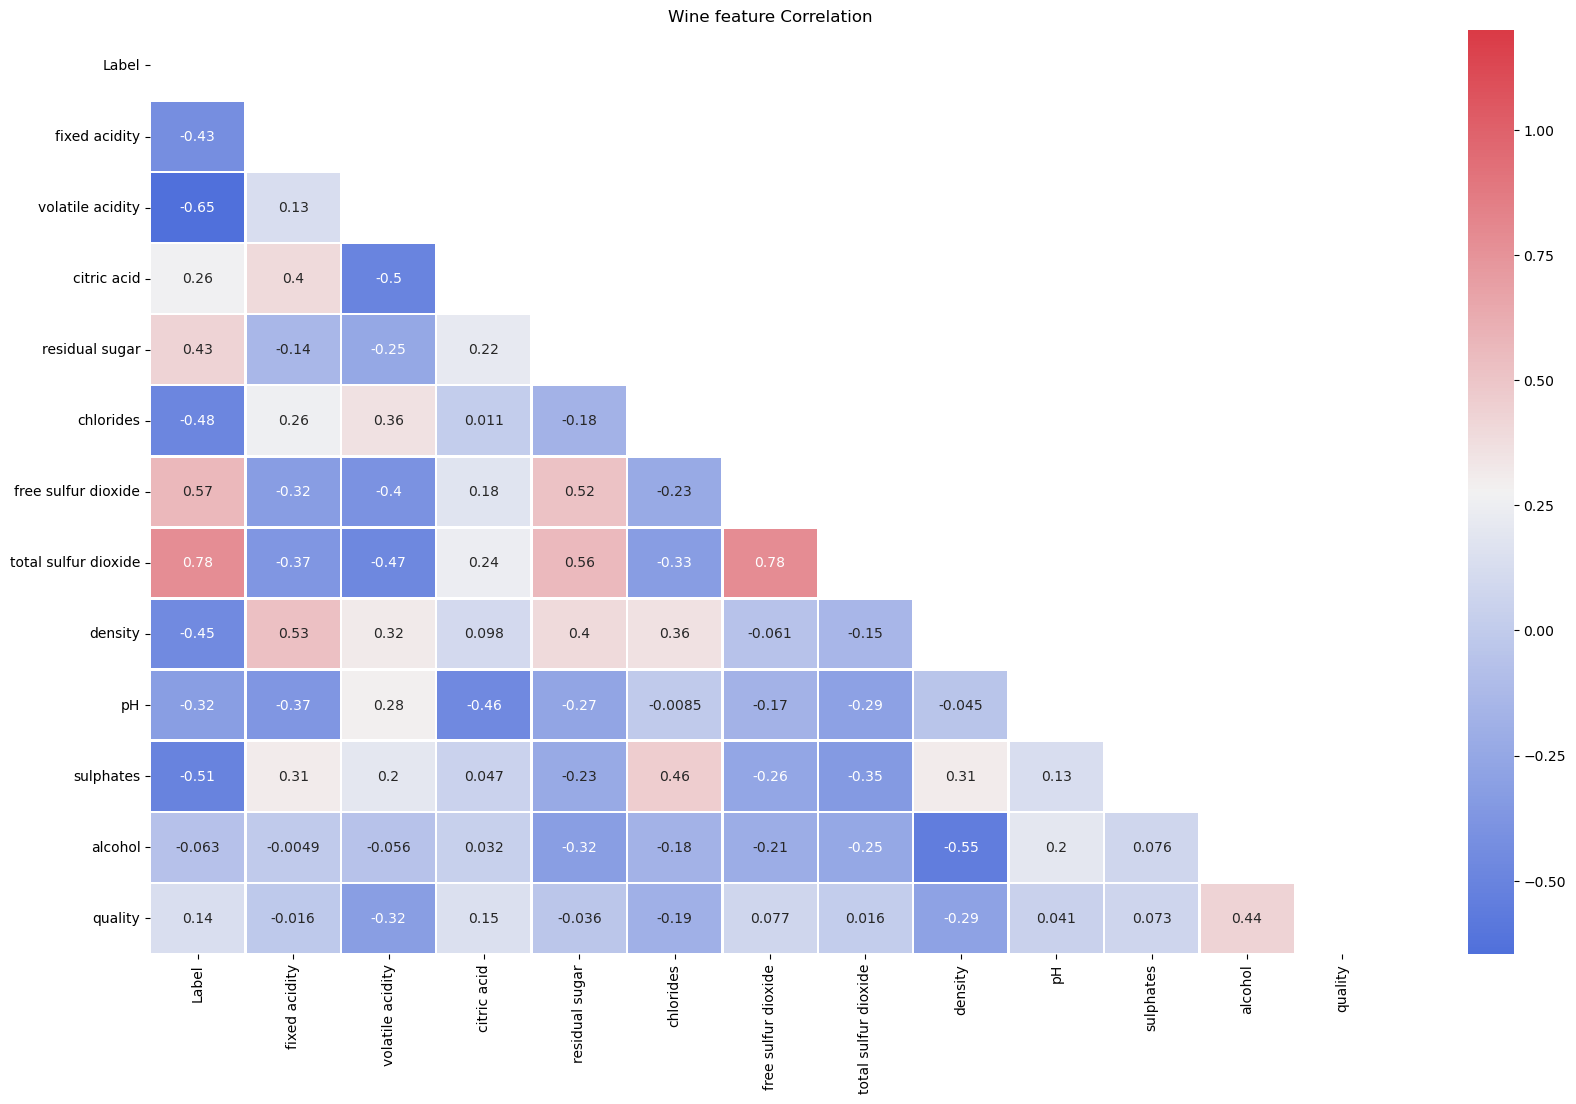

In [125]:
import numpy as np
corrMatt = dataset.corr()
# print(corrMatt)  相关矩阵

mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Wine feature Correlation')

cmap = sns.diverging_palette(260, 10, as_cmap=True)

sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

In [180]:
#Feature selection
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2,k=8)
Xnf_train = selector.fit_transform(Xn_train,y_train)
Xnf_test = selector.transform(Xn_test)
Xnf_train

array([[0.0474315 , 0.29188615, 0.94862999, ..., 0.00284589, 0.09267385,
        0.05108008],
       [0.47219735, 0.21143165, 0.74001077, ..., 0.02360987, 0.3418145 ,
        0.21143165],
       [0.08104249, 0.34189802, 0.92439095, ..., 0.00607819, 0.11649859,
        0.06331445],
       ...,
       [0.06094939, 0.21068924, 0.97067541, ..., 0.00338608, 0.08277077,
        0.04514769],
       [0.05800213, 0.29001066, 0.94521993, ..., 0.00440387, 0.10741136,
        0.07518795],
       [0.04715094, 0.33577183, 0.93587469, ..., 0.00321484, 0.07358404,
        0.04286449]])

In [172]:
#defining ANN model with two hidden layers, first hidden layer has 20 neurons, the next one has 10 neurons
model=keras.models.Sequential()
model.add(keras.layers.Dense(256, input_dim=12,activation="relu"))
model.add(keras.layers.Dense(512, activation="relu"))
# model.add(keras.layers.Dense(512, activation="linear"))
# model.add(keras.layers.Dense(512, activation="linear"))
model.add(keras.layers.Dense(1,activation='sigmoid'))
# model.add(keras.layers.Dense(1, activation='softmax'))

model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_112 (Dense)            (None, 256)               3328      
_________________________________________________________________
dense_113 (Dense)            (None, 512)               131584    
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 513       
Total params: 135,425
Trainable params: 135,425
Non-trainable params: 0
_________________________________________________________________


In [173]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [182]:
clf = keras.models.Sequential()
clf.add(keras.layers.Dense(50, input_dim=8, activation='relu'))
clf.add(keras.layers.Dense(100, activation='relu'))
clf.add(keras.layers.Dense(100, activation='relu'))
clf.add(keras.layers.Dense(1, activation='sigmoid'))
clf.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_119 (Dense)            (None, 50)                450       
_________________________________________________________________
dense_120 (Dense)            (None, 100)               5100      
_________________________________________________________________
dense_121 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 101       
Total params: 15,751
Trainable params: 15,751
Non-trainable params: 0
_________________________________________________________________


In [183]:
clf.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [184]:
#train the model
history = clf.fit((np.array(Xnf_train), np.array(y_train)), batch_size=10, epochs=20, validation_data=(np.array(Xnf_test), np.array(y_test)))

Train on 2558 samples, validate on 640 samples
Epoch 1/20
2558/2558 [==============================] - 1s 298us/sample - loss: 0.2156 - acc: 0.9824 - val_loss: 2.9546 - val_acc: 0.5359
Epoch 2/20
2558/2558 [==============================] - 0s 54us/sample - loss: 8.4022e-04 - acc: 1.0000 - val_loss: 3.9385 - val_acc: 0.5359
Epoch 3/20
2558/2558 [==============================] - 0s 52us/sample - loss: 2.0159e-04 - acc: 1.0000 - val_loss: 4.5721 - val_acc: 0.5359
Epoch 4/20
2558/2558 [==============================] - 0s 66us/sample - loss: 5.5021e-05 - acc: 1.0000 - val_loss: 5.1631 - val_acc: 0.5359
Epoch 5/20
2558/2558 [==============================] - 0s 67us/sample - loss: 1.9864e-05 - acc: 1.0000 - val_loss: 5.5550 - val_acc: 0.5359
Epoch 6/20
2558/2558 [==============================] - 0s 61us/sample - loss: 1.0074e-05 - acc: 1.0000 - val_loss: 5.8329 - val_acc: 0.5359
Epoch 7/20
2558/2558 [==============================] - 0s 60us/sample - loss: 6.1381e-06 - acc: 1.0000 - val_

In [176]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict_classes(Xn_test)
y_test = np.array(y_test)
print(y_pred)
print(y_test)
y_test = y_test.reshape((np.array(y_test)).shape[0], 1)
cm = confusion_matrix(np.array(y_test), y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]


0.5359375

In [ ]:
scores = model.evaluate(np.array(Xn_test), np.array(y_test), verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))